### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-08,428309,4294361,616829,563151,244420,130630,128220,162109,112407,91791,82006,122458,94015,4848,196950
2021-08-09,428682,4302961,617321,563562,244690,130667,128242,162860,112430,91810,82125,122601,94603,4848,197029
2021-08-10,429179,4314527,618137,564773,245476,130813,128273,163629,112575,91824,82227,122768,95111,4848,197102
2021-08-11,429669,4324483,618479,565748,246203,130921,128304,164413,112620,91841,82320,122953,95647,4848,197146
2021-08-12,430254,4334771,619093,566896,246811,131016,128334,165201,112700,91860,82407,123097,96215,4848,197209


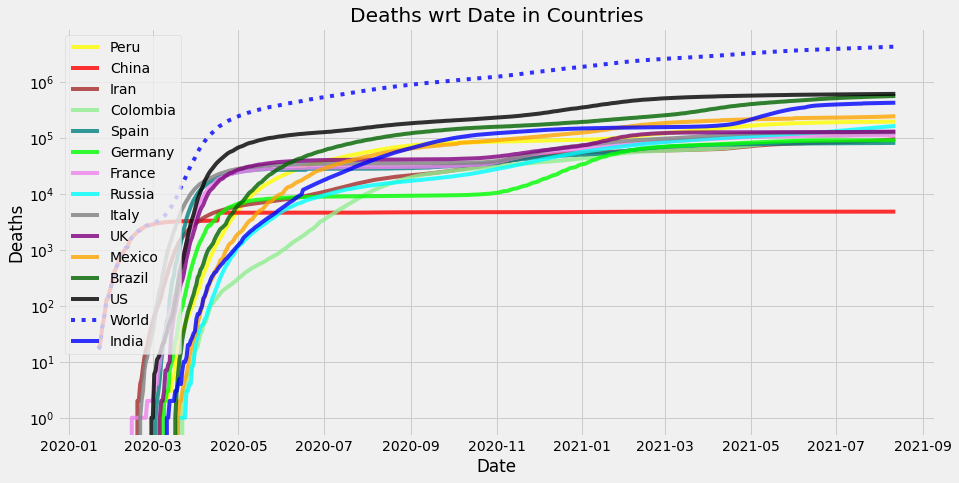

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-08,35499,437309,24234,13893,7573,27244,5733,22271,20450,2240,0,4350,39619,127,1217
2021-08-09,28204,656601,184346,12085,6513,25056,4200,21554,3919,2220,39638,4023,40808,145,503
2021-08-10,38353,637451,106871,34885,19555,23469,5624,20765,32020,3282,15680,3948,39139,115,1186
2021-08-11,41195,706957,135177,32443,22711,29381,6921,20958,32794,5487,17023,5368,42541,82,1482
2021-08-12,40120,684874,116545,39982,24975,32885,7267,21311,29671,5497,17410,4272,39049,104,1502


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-08,42704,561015,71621,39132,13536,29500,4650,22391,18097,2097,18548,11806,28267,72,1772
2021-08-09,41737,567387,79136,37329,13068,29204,4620,22336,17151,2105,19954,11287,29103,77,1687
2021-08-10,41512,572058,80985,37166,13501,28822,4687,22231,18143,2183,19669,10798,29772,80,1654
2021-08-11,41490,581052,84598,36851,14115,28859,4836,22146,19119,2403,19492,10436,30623,80,1642
2021-08-12,41399,587973,86728,37060,14839,29127,4998,22090,19823,2610,19354,10025,31185,81,1633


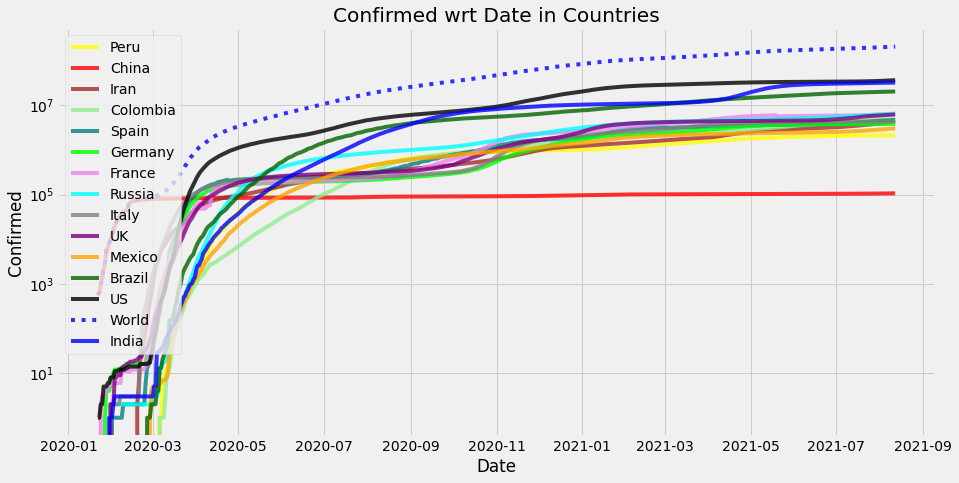

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-08,447,7429,111,399,172,45,11,766,28,2,0,181,542,0,77
2021-08-09,373,8600,492,411,270,37,22,751,23,19,119,143,588,0,79
2021-08-10,497,11566,816,1211,786,146,31,769,145,14,102,167,508,0,73
2021-08-11,490,9956,342,975,727,108,31,784,45,17,93,185,536,0,44
2021-08-12,585,10288,614,1148,608,95,30,788,80,19,87,144,568,0,63


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-08,564.18,9218.99,411.27,941.73,410.95,79.79,18.50,767.08,39.74,16.46,46.69,263.26,374.93,-0.0,81.44
2021-08-09,540.28,9141.62,421.36,875.39,393.33,74.44,18.94,765.07,37.65,16.78,55.73,248.22,401.56,-0.0,81.14
2021-08-10,534.87,9444.66,470.69,917.34,442.41,83.39,20.44,765.56,51.07,16.43,61.51,238.07,414.87,-0.0,80.12
2021-08-11,529.26,9508.58,454.60,924.55,477.99,86.46,21.76,767.87,50.31,16.50,65.45,231.44,430.01,-0.0,75.61
2021-08-12,536.23,9606.01,474.53,952.48,494.24,87.53,22.79,770.38,54.02,16.81,68.14,220.51,447.26,-0.0,74.03


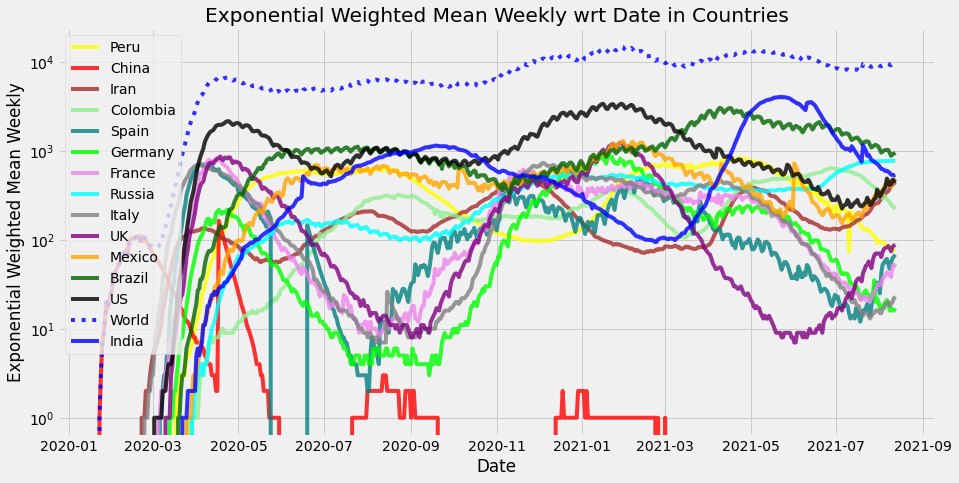

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

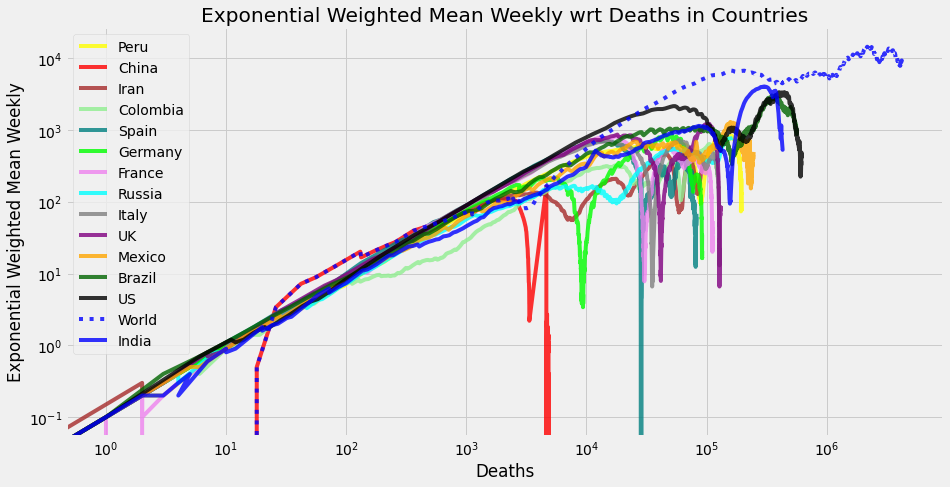

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

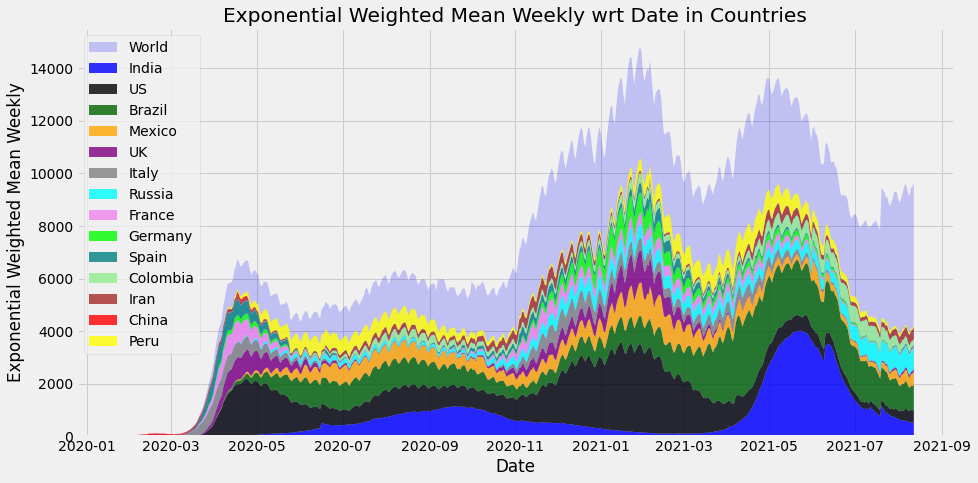

In [20]:
stackplotter(AVG, name)

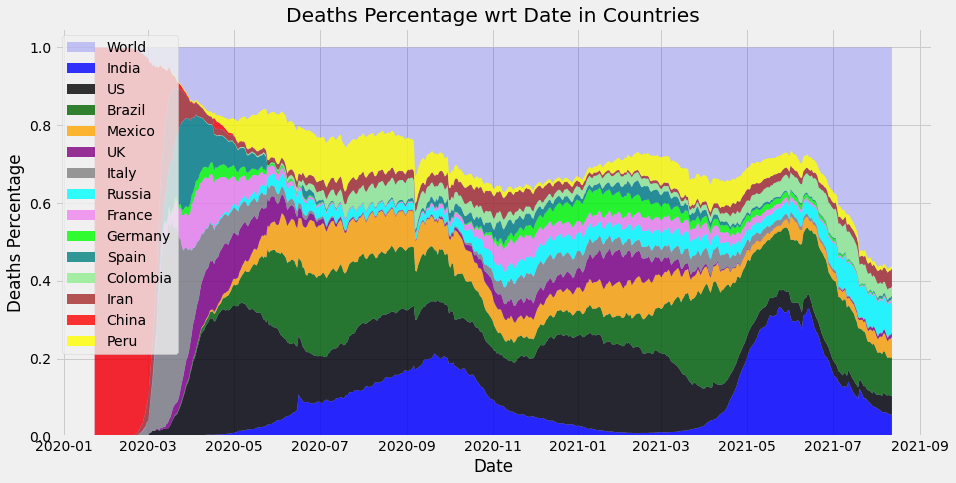

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

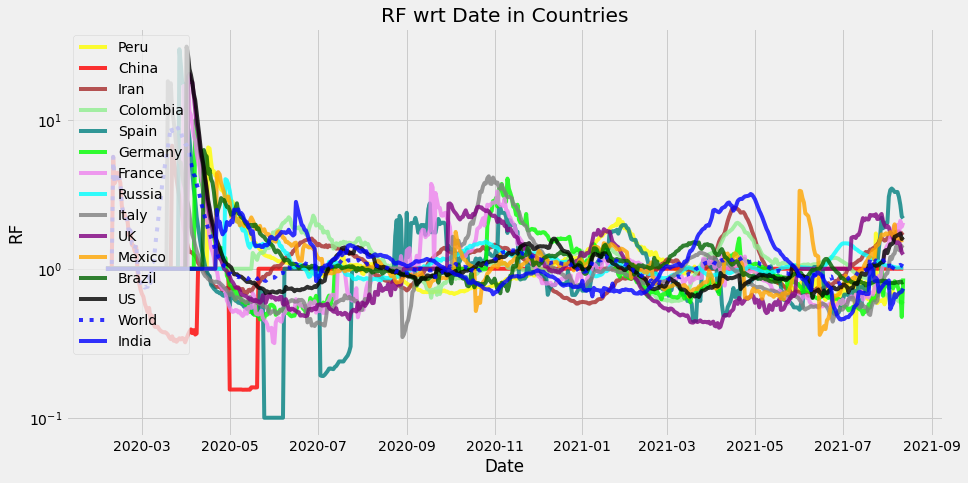

In [23]:
plotter(Reproductivity, 'RF')

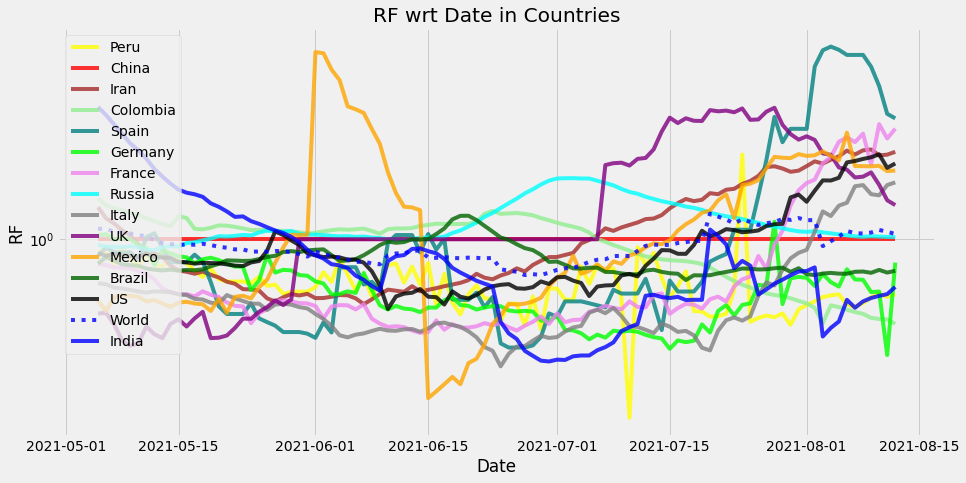

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

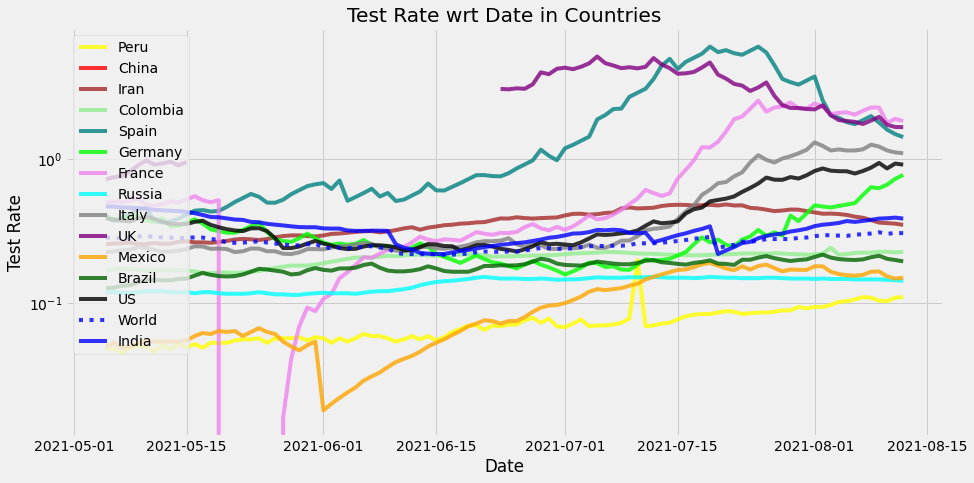

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

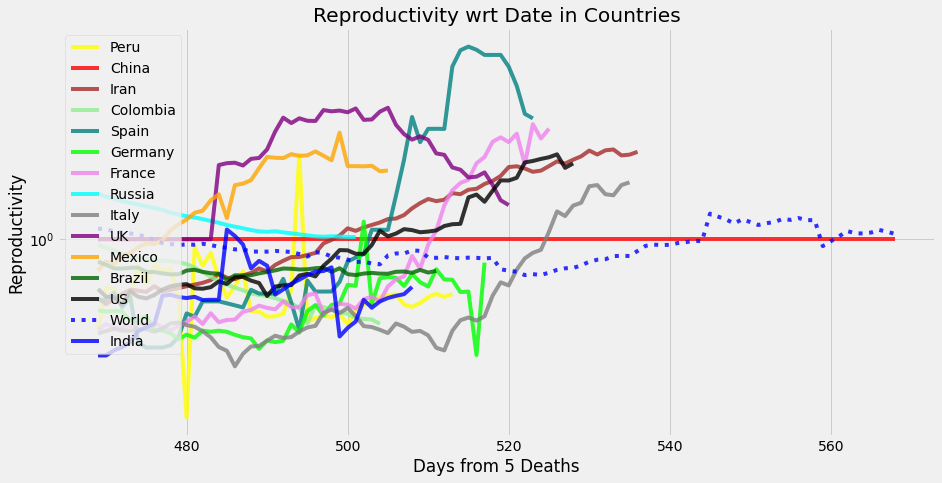

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

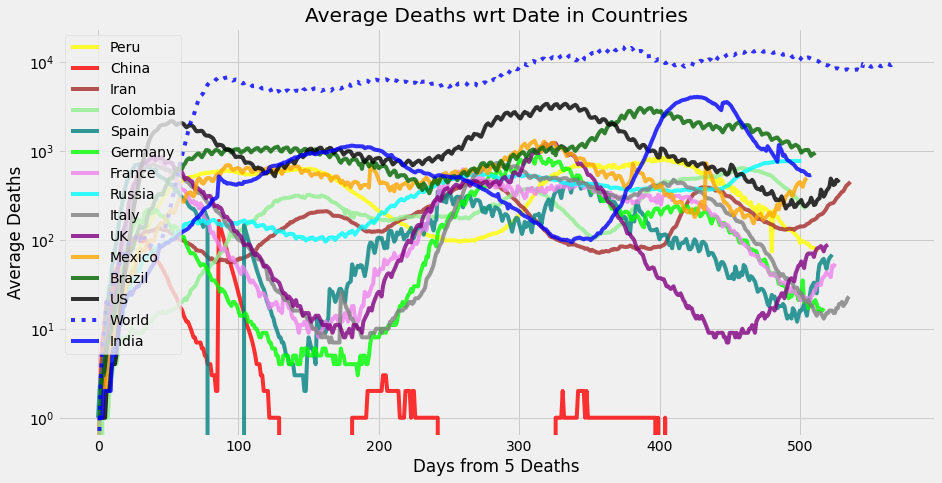

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

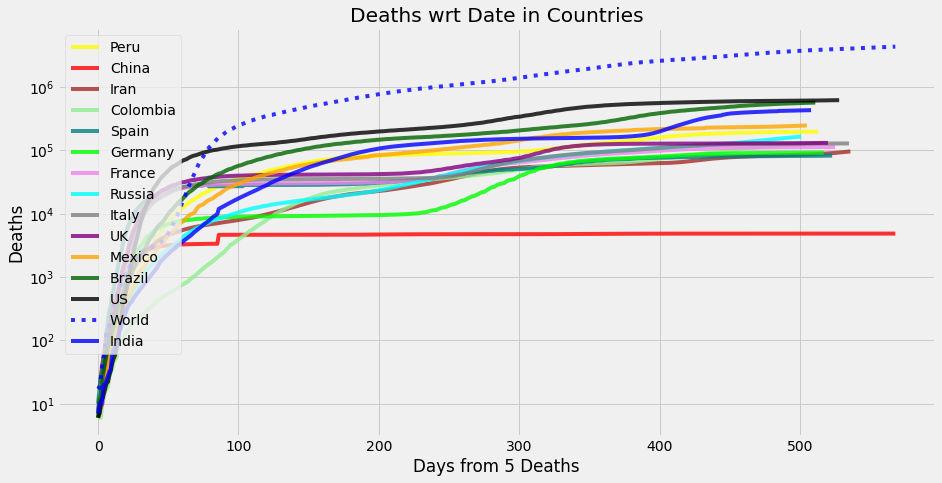

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4334771,10288,9568.71,9606.01,1.0348,205414138,0.306,587973,866.95
US,619093,614,535.29,474.53,1.6291,36306724,0.914,86728,123.82
Brazil,566896,1148,884.29,952.48,0.8162,20285067,0.195,37060,113.38
India,430254,585,500.00,536.23,0.7359,32117826,0.386,41399,86.05
Mexico,246811,608,520.86,494.24,1.5570,3045571,0.150,14839,49.36
Peru,197209,63,64.14,74.03,0.7028,2130018,0.110,1633,39.44
Russia,165201,788,771.14,770.38,1.0142,6447229,0.143,22090,33.04
UK,131016,95,89.43,87.53,1.2463,6208908,1.664,29127,26.20
Italy,128334,30,24.43,22.79,1.4424,4420429,1.097,4998,25.67


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4334771,10288,9568.71,9606.01,1.0348,205414138,0.306,587973,866.95
Indonesia,113664,1466,1612.71,1606.45,1.0998,3774155,0.104,33567,22.73
Brazil,566896,1148,884.29,952.48,0.8162,20285067,0.195,37060,113.38
Russia,165201,788,771.14,770.38,1.0142,6447229,0.143,22090,33.04
US,619093,614,535.29,474.53,1.6291,36306724,0.914,86728,123.82
Mexico,246811,608,520.86,494.24,1.5570,3045571,0.150,14839,49.36
Iran,96215,568,512.43,447.26,1.7557,4320266,0.349,31185,19.24
India,430254,585,500.00,536.23,0.7359,32117826,0.386,41399,86.05
South Africa,76247,473,339.14,364.93,0.9133,2568511,0.157,11494,15.25


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  4334771


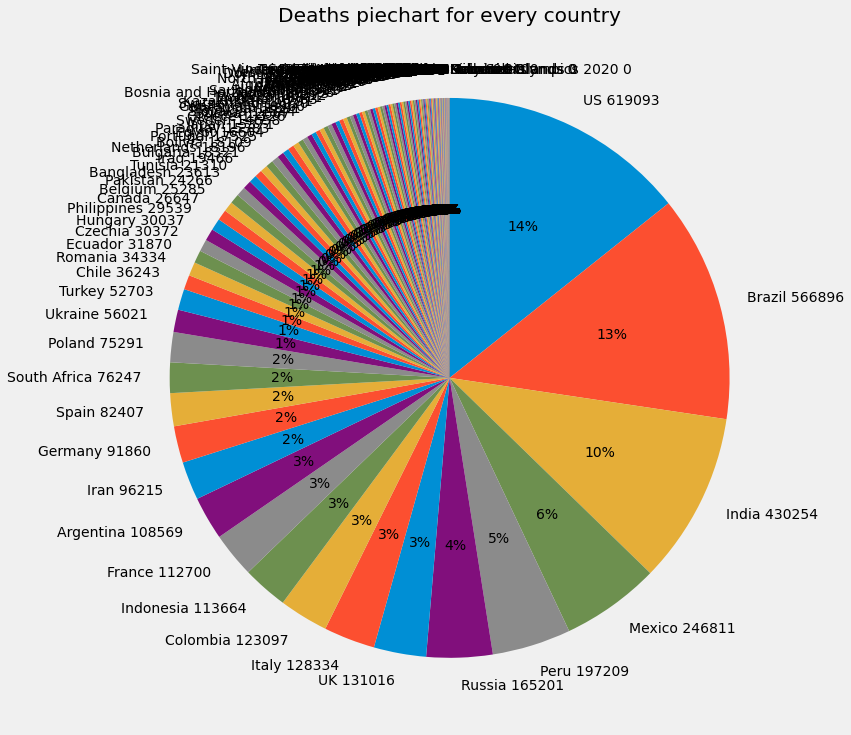

In [35]:
piechart('Deaths')

World total:  9568


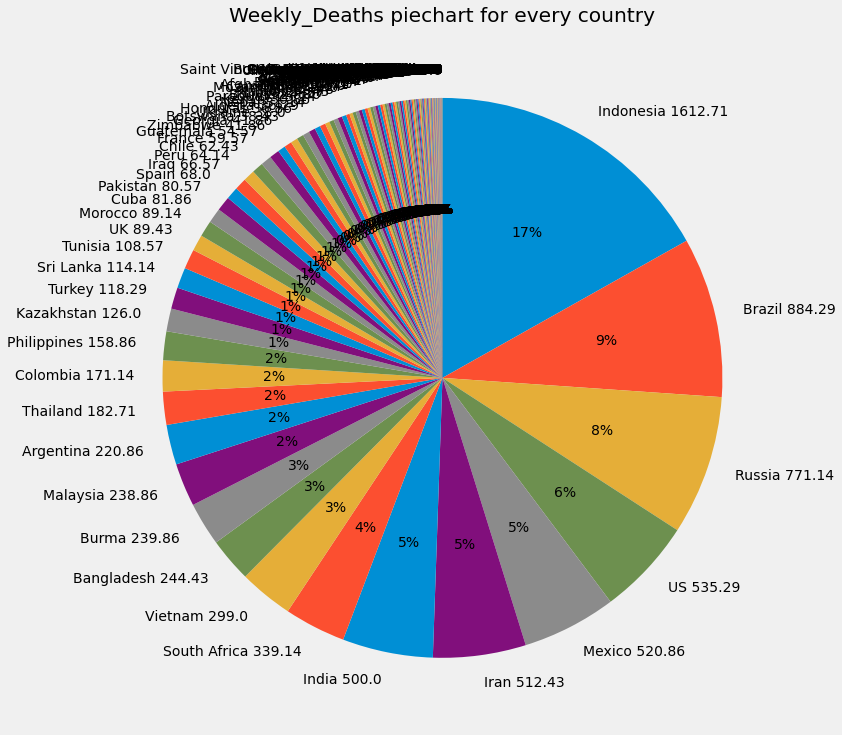

In [36]:
piechart('Weekly_Deaths')

World total:  10288


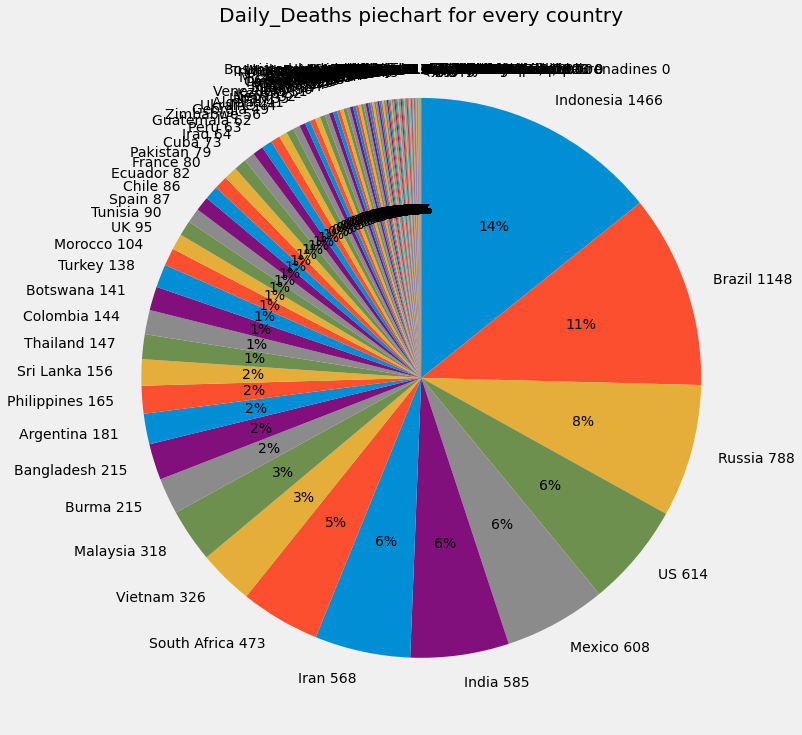

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-08-13


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

866954200.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master c194ad0] `date` update
 1 file changed, 1526 insertions(+), 65 deletions(-)


To https://github.com/Arrowheadahp/COVID-19.git
   cf9e212..c194ad0  master -> master
